In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# For visualizations
import plotly.graph_objs as go # plotly graphical object
from string import ascii_letters
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy import stats

# For scaling dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load data
df = pd.read_csv(r'C:\Users\maico\OneDrive\Documents\Desktop\dataset_aq_2.csv', encoding='latin-1', index_col='ID')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16890 entries, 1 to 16890
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          16890 non-null  int64  
 1   Value         16890 non-null  float64
 2   Country       16890 non-null  object 
 3   Month         16890 non-null  object 
 4   Pollutant     16890 non-null  object 
 5   PPM_uom       16890 non-null  float64
 6   CompleteDate  16890 non-null  object 
 7   Remarks-val   16890 non-null  object 
 8   City          16879 non-null  object 
 9   Province      16890 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.4+ MB


In [5]:
# First we will keep a copy of data
df_copy = df.copy()

In [6]:
df.describe(include='all')

,Year,Value,Country,Month,Pollutant,PPM_uom,CompleteDate,Remarks-val,City,Province
count,16890.000000,16890.000000,16890,16890,16890,1.689000e+04,16890,16890,16879,16890
unique,NaN,NaN,2,12,8,NaN,78,2,2589,788
top,NaN,NaN,US,March,o3,NaN,5/1/2022,positiveval,Ncore,British Columbia
freq,NaN,NaN,14725,3944,5888,NaN,3794,16692,64,723
mean,2021.090941,4.361547,NaN,NaN,NaN,-3.301236e+01,NaN,NaN,NaN,NaN
std,1.478652,14.955396,NaN,NaN,NaN,8.550446e+03,NaN,NaN,NaN,NaN
min,2014.000000,-1111.000000,NaN,NaN,NaN,-1.111000e+06,NaN,NaN,NaN,NaN
25%,2020.000000,0.028224,NaN,NaN,NaN,4.000000e+00,NaN,NaN,NaN,NaN
50%,2022.000000,0.046000,NaN,NaN,NaN,1.200000e+01,NaN,NaN,NaN,NaN
75%,2022.000000,5.524299,NaN,NaN,NaN,3.524142e+01,NaN,NaN,NaN,NaN


In [7]:
df.shape

(16890, 10)

In [8]:
df.head(10)

,Year,Value,Country,Month,Pollutant,PPM_uom,CompleteDate,Remarks-val,City,Province
ID,,,,,,,,,,
1,2014,5.0000,US,March,pm25,5.0,3/1/2014,positiveval,Spartan - Emory University,Atlanta
2,2014,5.0000,US,March,pm25,5.0,3/1/2014,positiveval,Spartan - Emory University,Atlanta
3,2014,7.1000,US,August,pm25,7.1,8/1/2014,positiveval,Spartan - Mammoth Cave,Mammoth Cave Np
4,2014,7.1000,US,August,pm25,7.1,8/1/2014,positiveval,Spartan - Mammoth Cave,Mammoth Cave Np
5,2015,0.0098,US,December,no2,9.8,12/1/2015,positiveval,Mustang Bayou C619,Houston
6,2015,0.0180,US,December,o3,18.0,12/1/2015,positiveval,Mustang Bayou C619,Houston
7,2016,0.0350,US,March,o3,35.0,3/1/2016,positiveval,Davidsonville,Baltimore-Towson
8,2016,0.0350,US,March,o3,35.0,3/1/2016,positiveval,Davidsonville,Baltimore-Towson
9,2016,0.0470,US,March,o3,47.0,3/1/2016,positiveval,Eldospgs,Cedar


In [9]:
# Remove negative so2 value
# Possible data error - minimum value should be air quality index - https://www.airnow.gov/aqi/aqi-basics/
df = df[df['Value'] >= 0]

In [10]:
df.groupby('Pollutant')['Value'].mean()

Pollutant
bc       7.525160
co       0.278792
no       0.007021
no2      0.014621
o3       0.046541
pm10    21.350106
pm25     7.219358
so2      0.000765
Name: Value, dtype: float64

In [11]:
df.groupby('Pollutant')['Value'].max()

Pollutant
bc      410.190000
co       14.500000
no        0.007021
no2      14.000000
o3       65.000000
pm10    346.462604
pm25    614.400000
so2       0.178000
Name: Value, dtype: float64

## Clustering for US dataset for years 2020, 2021, & 2022

In [12]:
# Filter to only years 2020, 2021, and 2022
df_cluster_test = df[df['Year'] >= 2020] 
df_cluster_test_us = df_cluster_test[df_cluster_test['Country'] == 'US']

# Keep a copy of data
df_cluster_test_us_copy = df_cluster_test_us.copy()

In [13]:
# Data Preprocessing

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_cluster_test_us = df_cluster_test_us.apply(le.fit_transform)
df_cluster_test_us.head()

,Year,Value,Country,Month,Pollutant,PPM_uom,CompleteDate,Remarks-val,City,Province
ID,,,,,,,,,,
1724,0,0,0,4,7,0,0,0,644,37
1725,0,0,0,4,7,0,0,0,644,37
1726,0,502,0,4,3,856,0,0,644,37
1727,0,502,0,4,3,856,0,0,644,37
1728,0,5697,0,4,6,2810,0,0,1630,41


In [14]:
from kmodes.kmodes import KModes

In [15]:
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 10, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_cluster_test_us)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 466, cost: 68511.0


In [16]:
# Predicted Clusters
fitClusters_cao

array([0, 0, 1, ..., 1, 1, 1], dtype=uint16)

In [17]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df_cluster_test_us.columns

In [18]:
# Mode of the clusters
clusterCentroidsDf

,Year,Value,Country,Month,Pollutant,PPM_uom,CompleteDate,Remarks-val,City,Province
0,2,0,0,7,4,0,14,0,1235,510
1,2,4056,0,8,6,856,20,0,1235,510
2,2,5697,0,0,4,2810,17,0,1235,380


In [19]:
kmodes = km_cao.cluster_centroids_
shape = kmodes.shape
shape

(3, 10)

In [20]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "cao", n_init = 10, verbose=1)
    kmode.fit_predict(df_cluster_test_us)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 81791.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 81791.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 81791.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 81791.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 81791.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 81791.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 81791.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration:

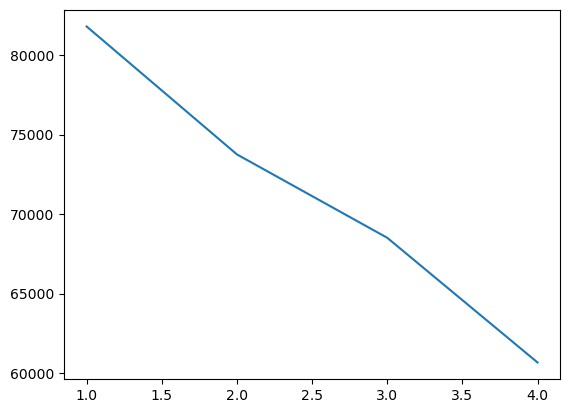

In [21]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [22]:
df_cluster_test_us = df_cluster_test_us_copy.reset_index()

In [23]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df_cluster_test_us, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index'], axis = 1)

In [24]:
combinedDf.head()

,ID,Year,Value,Country,Month,Pollutant,PPM_uom,CompleteDate,Remarks-val,City,Province,cluster_predicted
0,1724,2020,0.000,US,January,so2,0.0,1/1/2020,positiveval,Gardiner,Augusta-Waterville,0
1,1725,2020,0.000,US,January,so2,0.0,1/1/2020,positiveval,Gardiner,Augusta-Waterville,0
2,1726,2020,0.003,US,January,no2,3.0,1/1/2020,positiveval,Gardiner,Augusta-Waterville,1
3,1727,2020,0.003,US,January,no2,3.0,1/1/2020,positiveval,Gardiner,Augusta-Waterville,1
4,1728,2020,10.000,US,January,pm25,10.0,1/1/2020,positiveval,Shafter - Walker Str,Bakersfield,2


In [25]:
label = km_cao.labels_
combinedDf['cluster_name'] = ['cluster1' if x == 0 else\
                           'cluster2' if x == 1 else\
                           'cluster3' if x == 2 else\
                           'cluster4' for x in label]

In [26]:
combinedDf.head()

,ID,Year,Value,Country,Month,Pollutant,PPM_uom,CompleteDate,Remarks-val,City,Province,cluster_predicted,cluster_name
0,1724,2020,0.000,US,January,so2,0.0,1/1/2020,positiveval,Gardiner,Augusta-Waterville,0,cluster1
1,1725,2020,0.000,US,January,so2,0.0,1/1/2020,positiveval,Gardiner,Augusta-Waterville,0,cluster1
2,1726,2020,0.003,US,January,no2,3.0,1/1/2020,positiveval,Gardiner,Augusta-Waterville,1,cluster2
3,1727,2020,0.003,US,January,no2,3.0,1/1/2020,positiveval,Gardiner,Augusta-Waterville,1,cluster2
4,1728,2020,10.000,US,January,pm25,10.0,1/1/2020,positiveval,Shafter - Walker Str,Bakersfield,2,cluster3


In [27]:
combinedDf.to_csv(r"C:\Users\maico\OneDrive\Documents\Desktop\cluster_us_2020_2012_2022.csv")